In [1]:
%matplotlib inline
import numpy 
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [2]:
#Parameters

nx = 81
dx = 0.25
dt = 0.0002
gamma = 1.4 
nt = int(0.01/dt)+1
x=numpy.linspace(-10,10,nx)

In [3]:
#Define rho with the initial conditions

def rho_initial(nx):
    
    rho = numpy.zeros(nx)
    rho[0:(nx-1)/2] = 1 #kg/m^3
    rho[(nx-1)/2:nx] = 0.125 #kg/m^3
    
    return rho

rho_initial = rho_initial(nx)
#print(rho)

In [4]:
#Define u with the initial conditions

#def u_initial():
    
u_initial = numpy.zeros(nx)
    
#    return u   

#u = u_initial()
#print(u)

In [5]:
#Define p with the initial conditions

def p_initial(nx):
    
    p = numpy.zeros(nx)
    p[0:(nx-1)/2] = 100*1000 #N/m^2
    p[(nx-1)/2:nx] = 10*1000 #N/m^2
    
    return p

p_initial = p_initial(nx)
#print(p)

In [6]:
def getE(p, rho, u):
    
    e = p/((gamma-1)*rho)
    e_t = e + (1/2*u**2)
    
    return e_t

In [7]:
e_t_initial = getE(p_initial, rho_initial, u_initial)
#print(e_t_initial)

In [8]:
rho_initial.shape

(81,)

In [9]:
def getU_vector(rho, u, e_t):

    u_vector = numpy.zeros((nx, 3))
    u_vector[:, 0] = rho
    u_vector[:, 1] = rho*u
    u_vector[:, 2] = rho*e_t
    
    return u_vector

In [10]:
u_vector_initial = getU_vector(rho_initial, u_initial, e_t_initial)

In [11]:
#u_vector_initial[:,1]/rho_initial==u_initial

In [12]:
def computeF(u_vector):

    f_vector = numpy.zeros((nx, 3))
     
    f_vector[:, 0] = u_vector[:, 1]
    f_vector[:, 1] = u_vector[:, 1]**2/u_vector[:, 0] + (gamma-1)*(u_vector[:, 2] - 0.5*u_vector[:, 1]**2/u_vector[:, 0])
    f_vector[:, 2] = (u_vector[:, 2] + (gamma-1)*(u_vector[:, 2] - 0.5*u_vector[:, 1]**2/u_vector[:, 0]))*(u_vector[:, 1]/u_vector[:, 0])
    
    return f_vector

In [13]:
def richtmyer (u, nt, dt, dx):
    un = numpy.zeros((nt, nx, 3))
    un[:,:,:] = u.copy()
    ustar = u.copy()
   
    for t in range(1, nt):
             
        #predictor
        f = computeF(u)
        
        ustar[:-1,:] = 0.5*(u[1:,:] + u[:-1,:]) - dt/(2*dx)*(f[1:,:] - f[:-1,:])
        
        #corrector
        fstar = computeF(ustar)
        
        un[t,1:-1,:] = u[1:-1,:] - dt/dx*(fstar[1:-1,:] - fstar[:-2,:])
        
        u = un[t,:,:].copy()
        
    return un

In [14]:
a = richtmyer(u_vector_initial, nt, dt, dx)
print(numpy.shape(a))

(51, 81, 3)


In [15]:
numpy.where(x==2.5)

(array([50]),)

In [16]:
#find final velocity
v_final=a[nt-1,:,1]/a[nt-1,:,0]

print("the velocity at x = 2.5 is:")
print(v_final[50]) #nx=50

the velocity at x = 2.5 is:
292.611471527


In [17]:
#find final density
rho_final = a[nt-1,:,0]

print("the density at x = 2.5 is:")
print(rho_final[50])

the density at x = 2.5 is:
0.374691402648


In [18]:
#find final pressure

p_final = (gamma-1)*(a[nt-1, :, 2]-0.5*(a[nt-1, :, 1])**2/a[nt-1,:,0])

print("the pressure at x = 2.5 is:")
print(p_final[50])

the pressure at x = 2.5 is:
30250.8901676



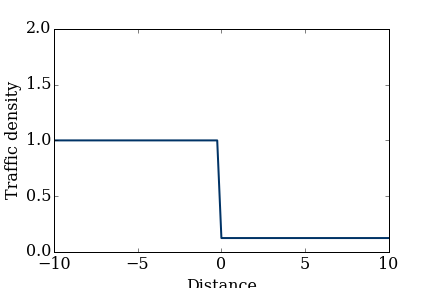
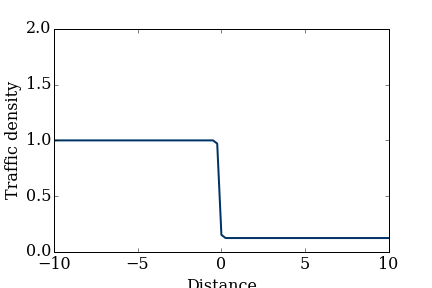
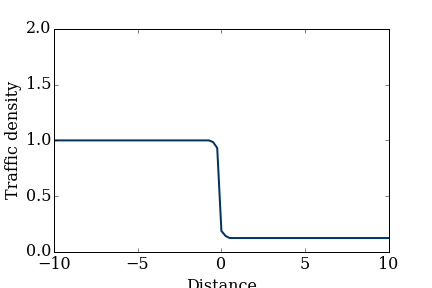
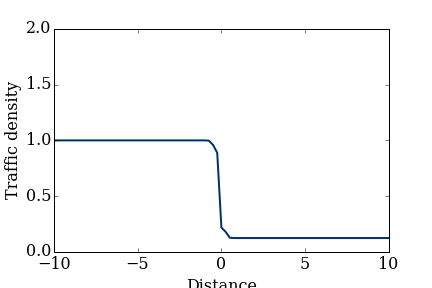
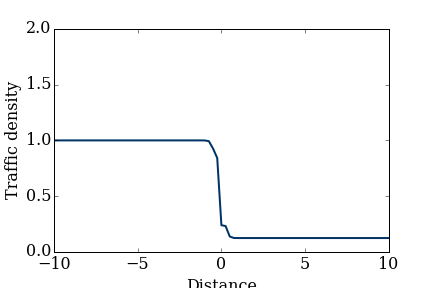
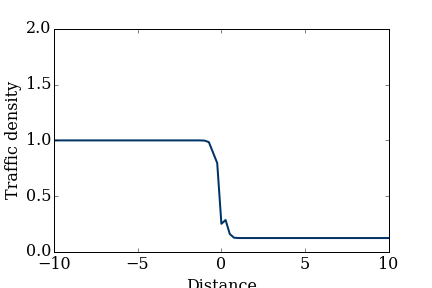
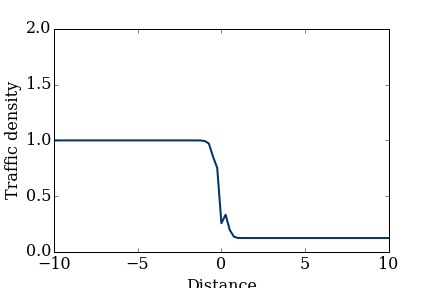
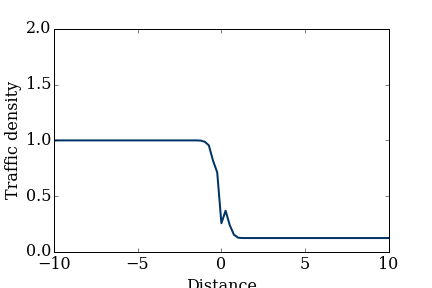
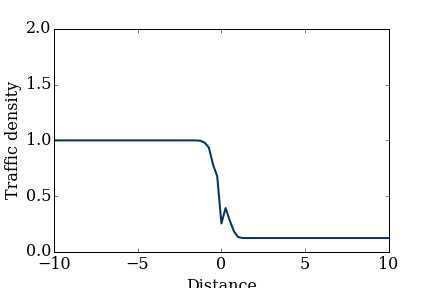
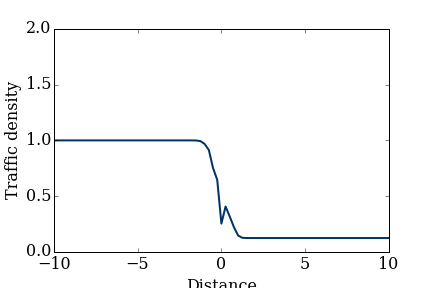
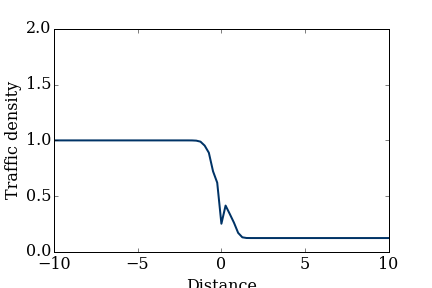
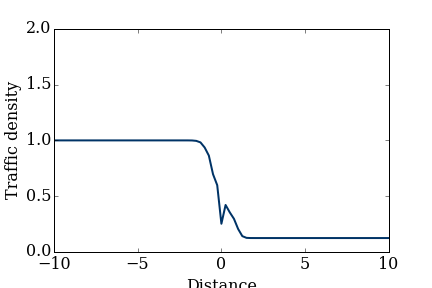
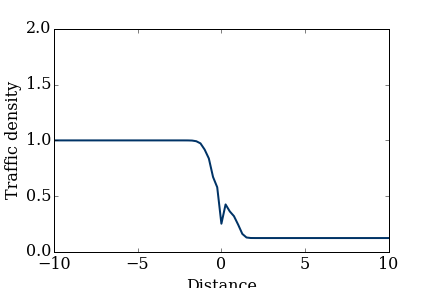
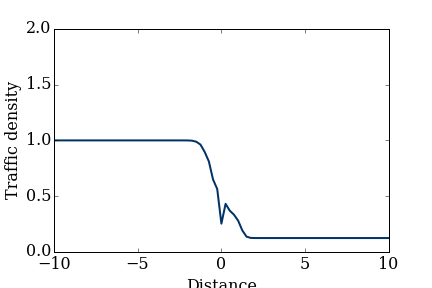
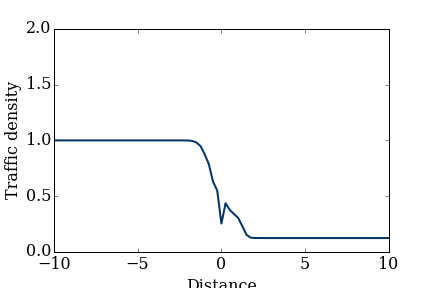
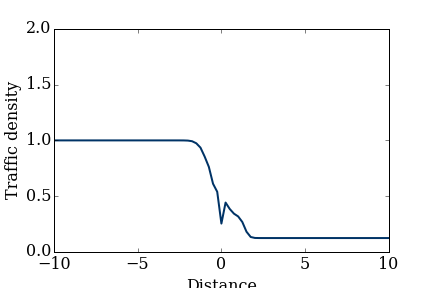
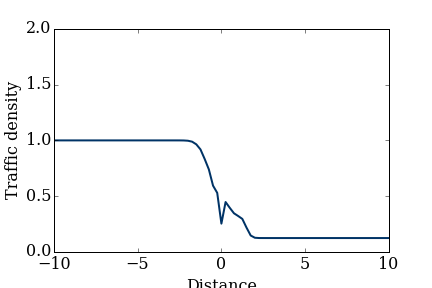
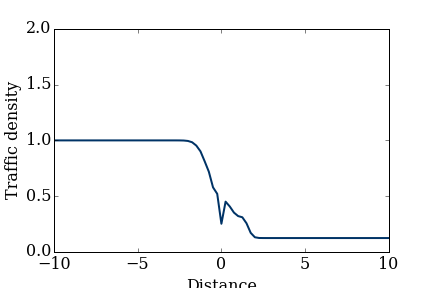
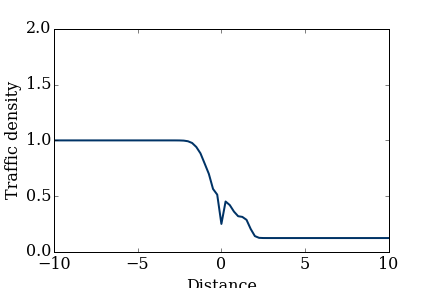
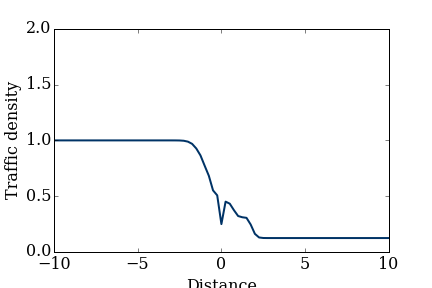
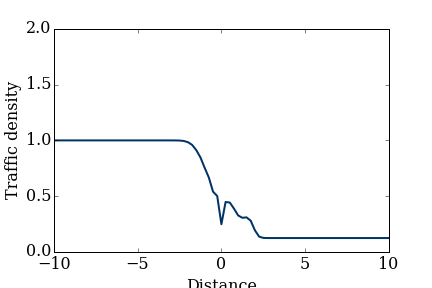
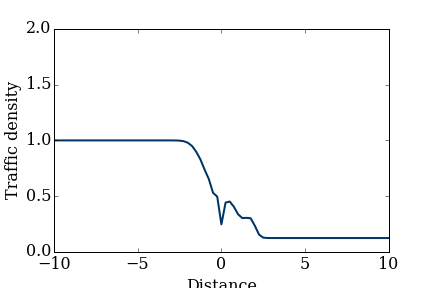
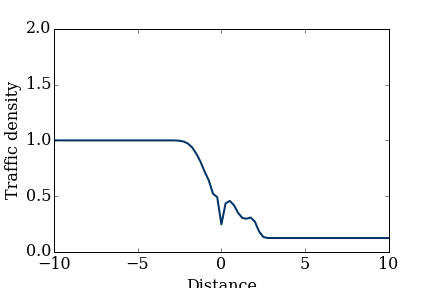
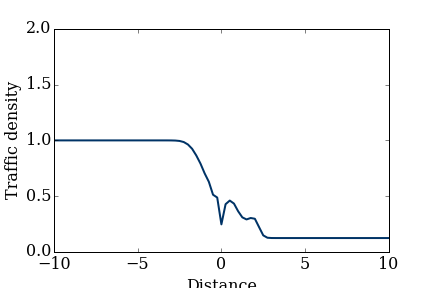
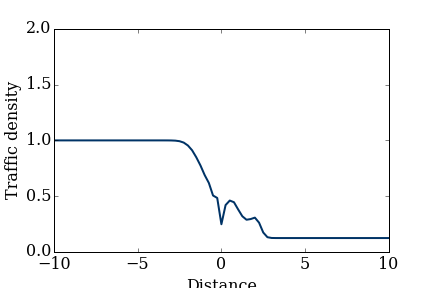
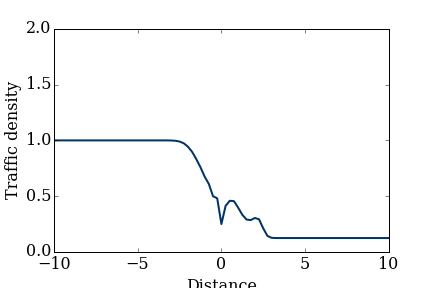
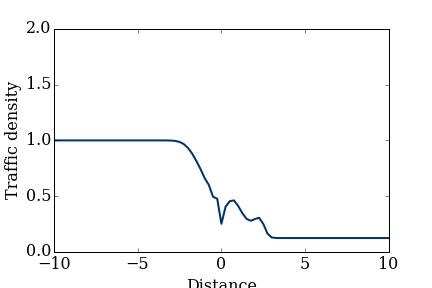
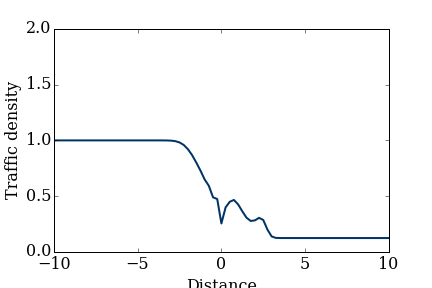
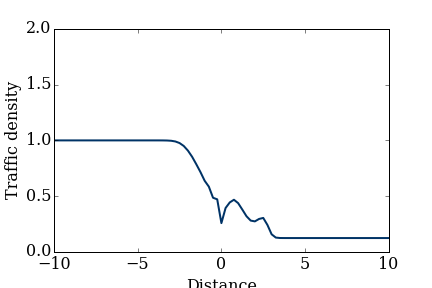
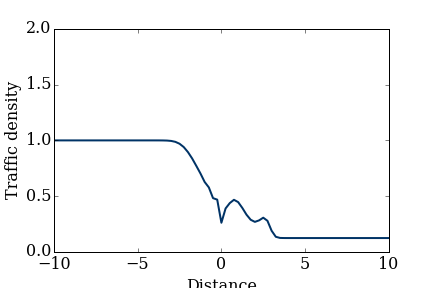
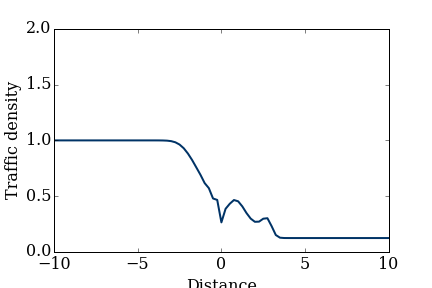
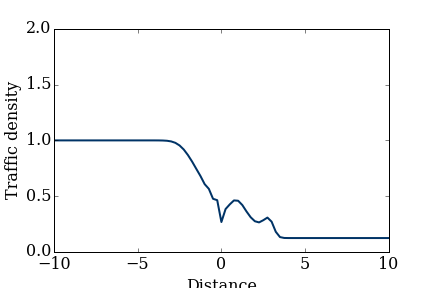
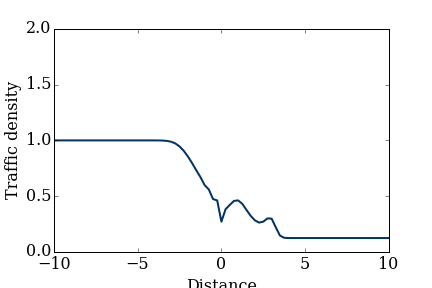
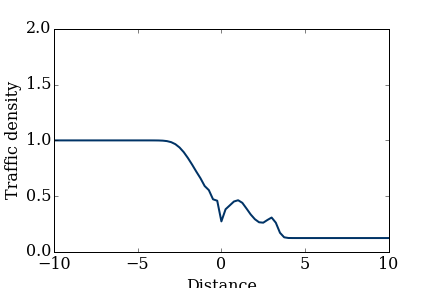
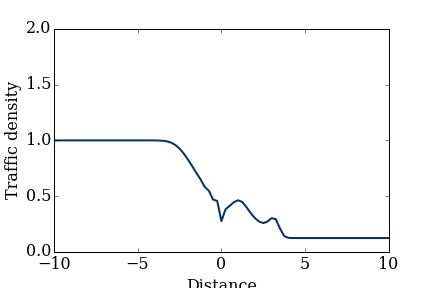
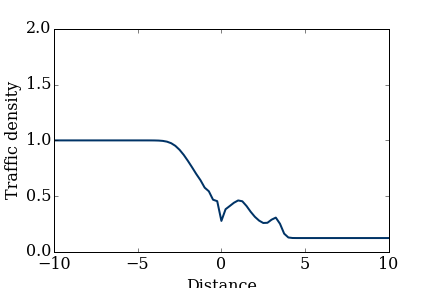
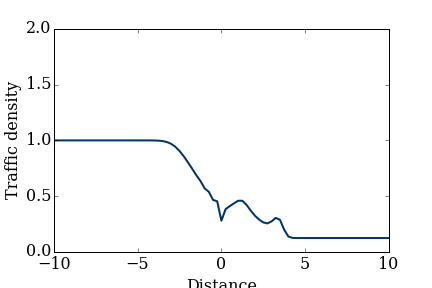
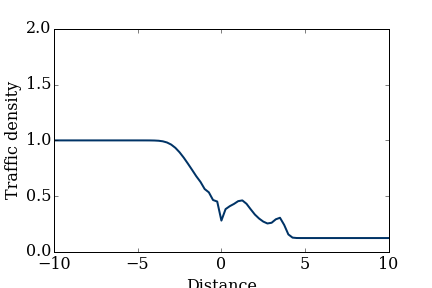
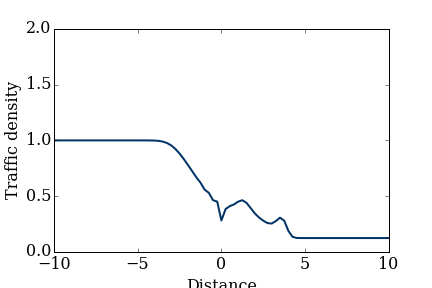
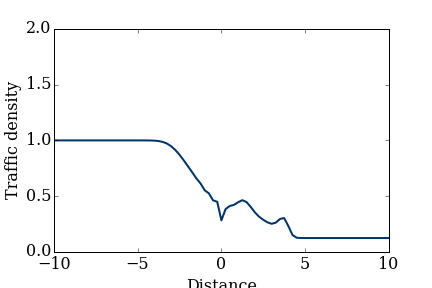
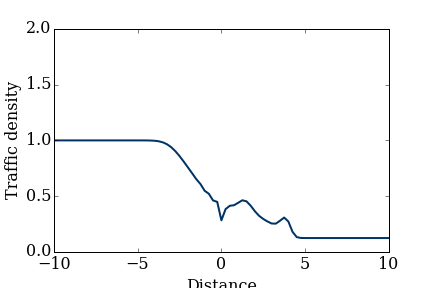
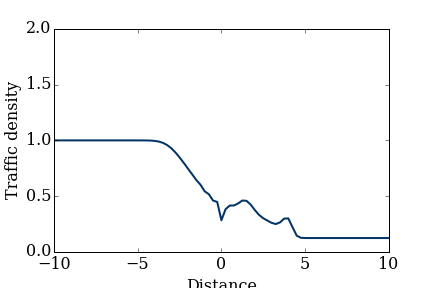
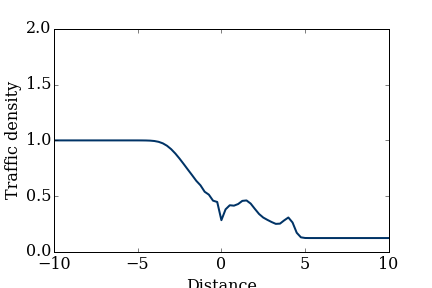
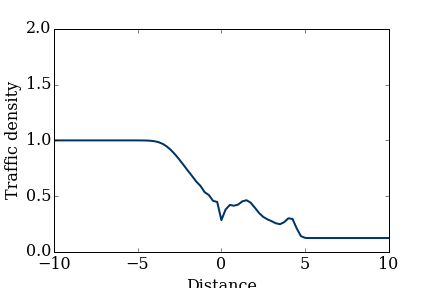
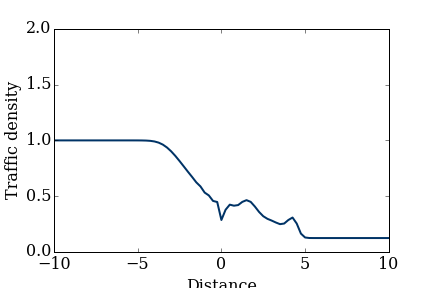
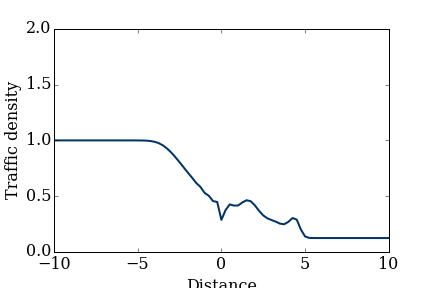
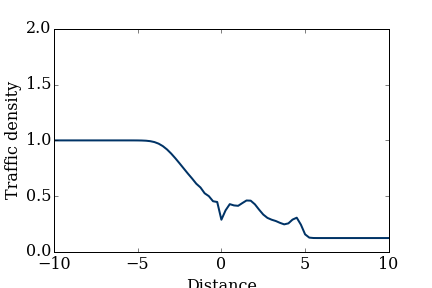
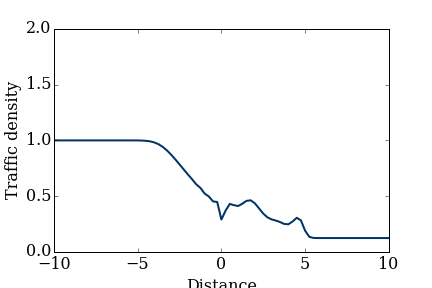
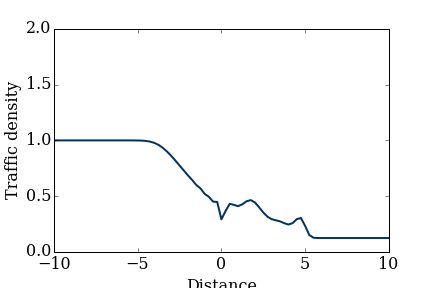
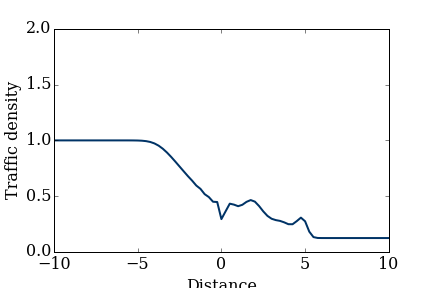

In [29]:
#diplay animation
fig = plt.figure();
ax = plt.axes(xlim=(-10,10),ylim=(0,2),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

def animate(data):
    x = numpy.linspace(-10,10,nx)
    y = a[data, :, 0]
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames=nt-1, interval=50)
display_animation(anim, default_mode='once')